# CESM 1.2.1 B1850CN FLORish(f05g16) Run
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [5]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
import pandas as pd

import geoxarray
from geoplots import mapplot
from geoplots import xticksyear

print('Last Updated:', datetime.datetime.now())

%matplotlib notebook

Last Updated: 2018-02-13 20:54:06.534320


### Data

In [2]:
years_clim = slice('2001', '2030') # years used for estimating climatology
ncfile = '/scratch/gpfs2/wenchang/archive/cesm1_2_1/B1850CN_f05g16_tigercpu_680PE/atm/hist/*.cam.h0.*.nc'
ds = xr.open_mfdataset(ncfile)
ds['time'] = [datetime.datetime(*t.replace(year=t.year+2000).timetuple()[0:6]) for t in ds['time'].values]
ds['time'] = ds['time'].to_index().shift(-1, 'MS')

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


### Global-mean Annual-mean Surface  Temperature

In [3]:
# data
data_name = 'TS'#'t_surf'
ts = ds[data_name].geo.fldmean().load()

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


<IPython.core.display.Javascript object>


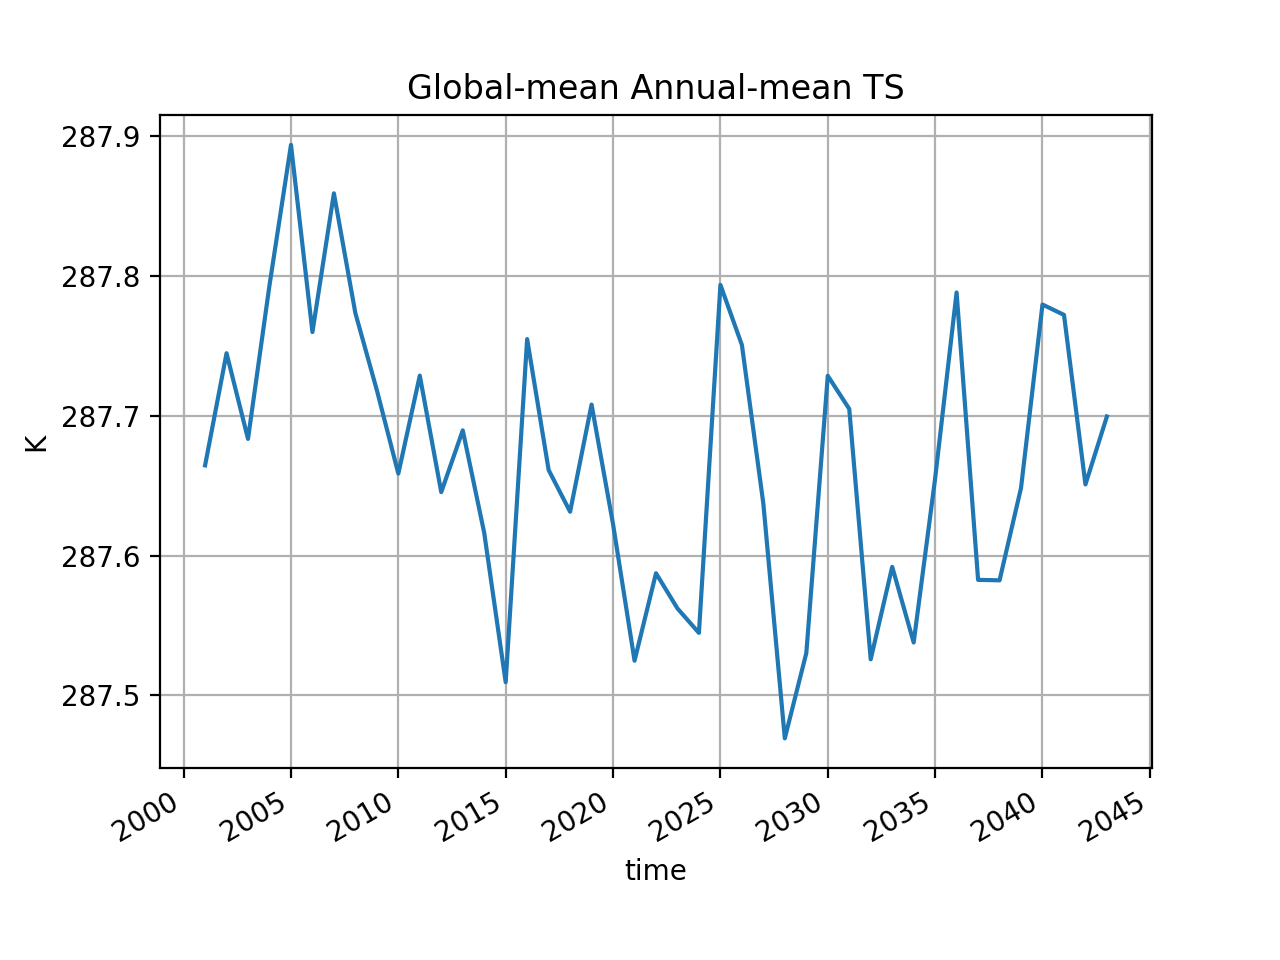

In [6]:
# plot
ts.resample(time='AS').mean('time').plot()
plt.grid(True)
plt.title(f'Global-mean Annual-mean {data_name}')
plt.ylabel('K')
xticksyear(5)

### Year 51-80 climatology

In [84]:
data_name = 'TS'#'t_surf'
da = ds[data_name].sel(time=years_clim).groupby('time.season').mean('time').load()

<IPython.core.display.Javascript object>


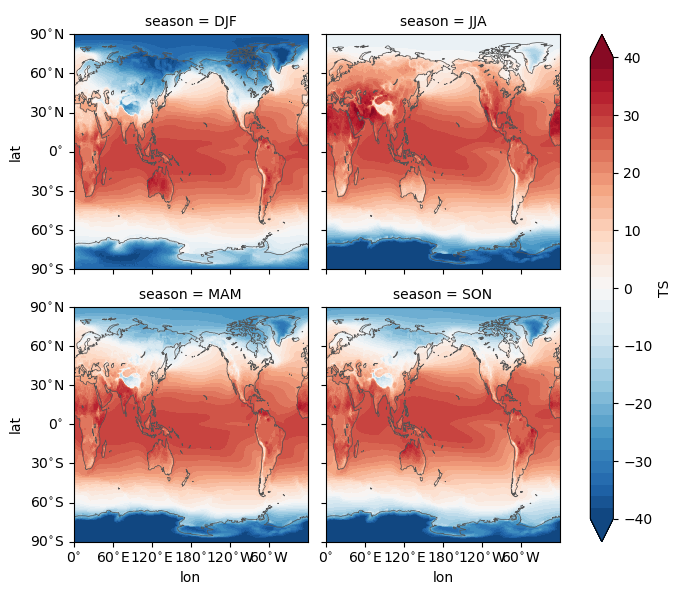

In [86]:
f = da.pipe(lambda x:x-273.15).plot.contourf(col='season', col_wrap=2, robust=True, 
                                             levels=range(-40, 41, 2))
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, coastlines_width=0.5)

In [87]:
data_name = 'PRECT'#'precip'
da = ds[data_name].sel(time=years_clim).groupby('time.season').mean('time').load()

<IPython.core.display.Javascript object>


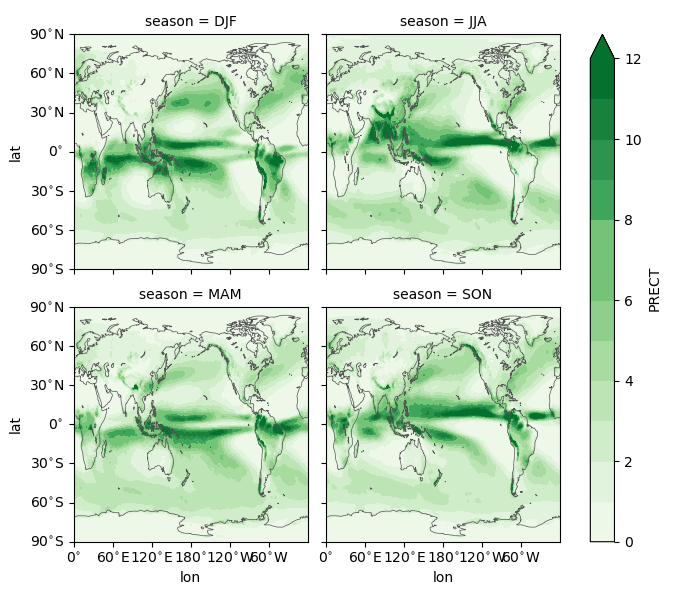

In [89]:
f = da.pipe(lambda x:x*24*3600*1000).plot.contourf(col='season', col_wrap=2, robust=True,
                                              cmap='Greens', levels=range(0,13))
for ii, ax in enumerate(f.axes.flat):
    mapplot(ax=ax, coastlines_width=0.5)

### Nino3.4 SST anomaly

In [7]:
data_name = 'TS'#'t_surf'
lons = slice(360-170, 360-120)
lats = slice(-5, 5)
ts = ds[data_name].sel(lon=lons, lat=lats).geo.fldmean().load()
tsa = ( ts.groupby('time.month') - ts.sel(time=years_clim).groupby('time.month').mean('time') ) # anomaly relative to climatology

<IPython.core.display.Javascript object>


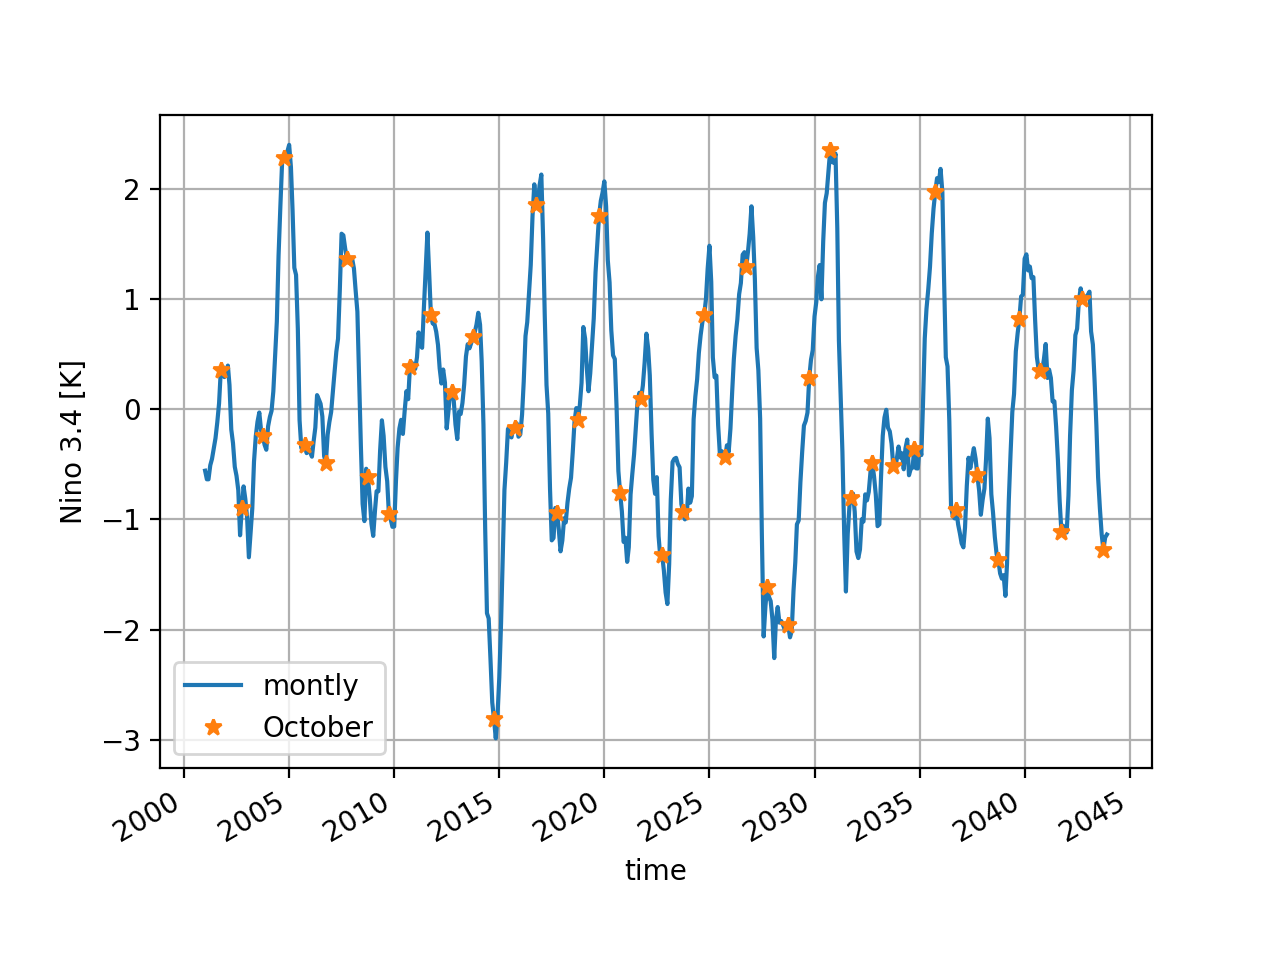

In [9]:
# monthly
tsa.plot(label='montly')
xticksyear(5)
plt.grid(True)
plt.ylabel('Nino 3.4 [K]')

# October values
tmp = tsa[tsa['time.month']==10]
tmp.plot(ls='none', marker='*', label='October')
plt.legend(frameon=True, loc='lower left')

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


<IPython.core.display.Javascript object>


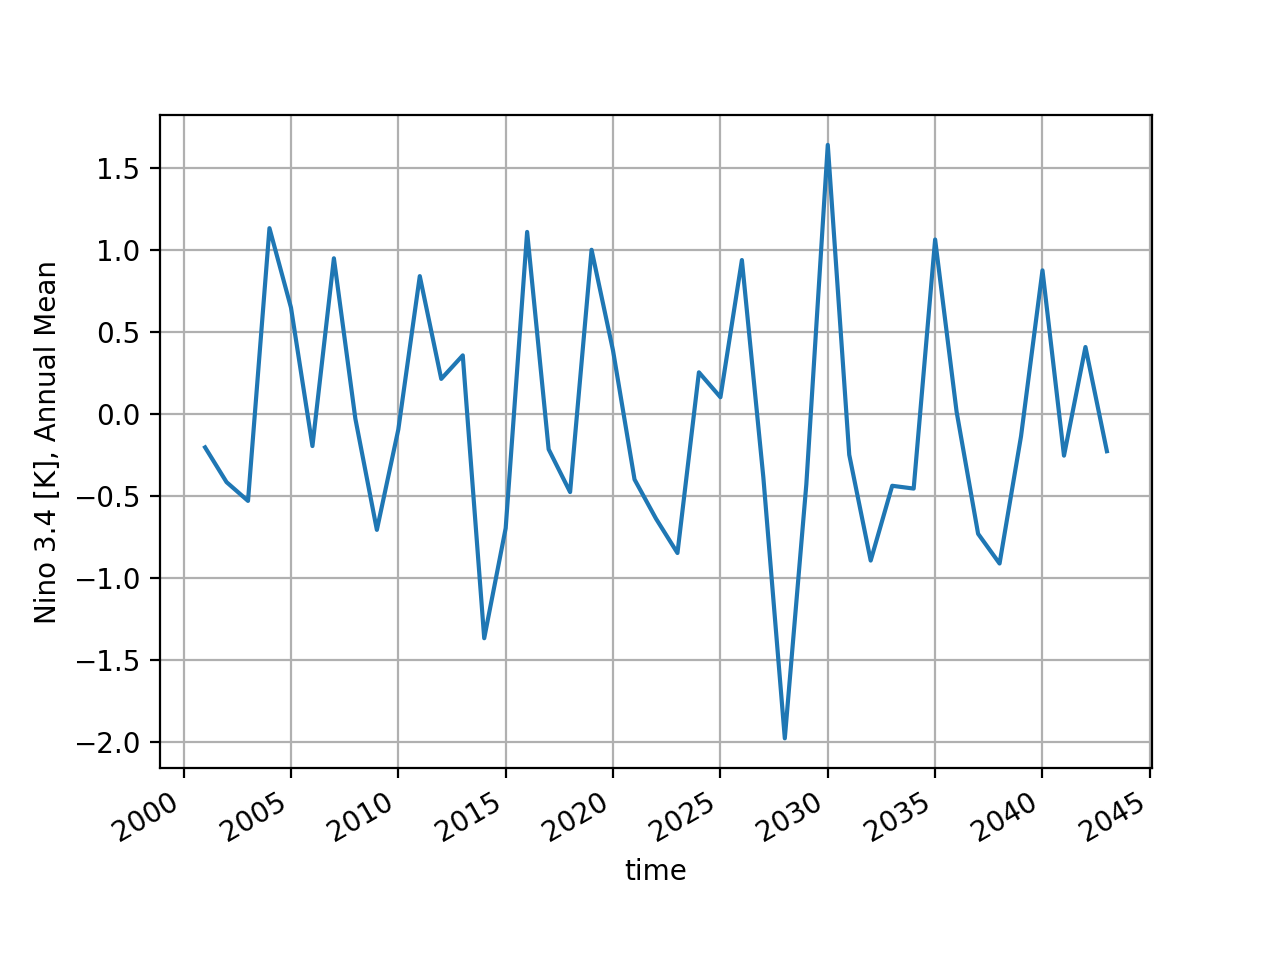

Text(0,0.5,'Nino 3.4 [K], Annual Mean')

In [10]:
# annual mean
tsa.resample(time='AS').mean('time').plot()
xticksyear(5)
plt.grid(True)
plt.ylabel('Nino 3.4 [K], Annual Mean')

<IPython.core.display.Javascript object>


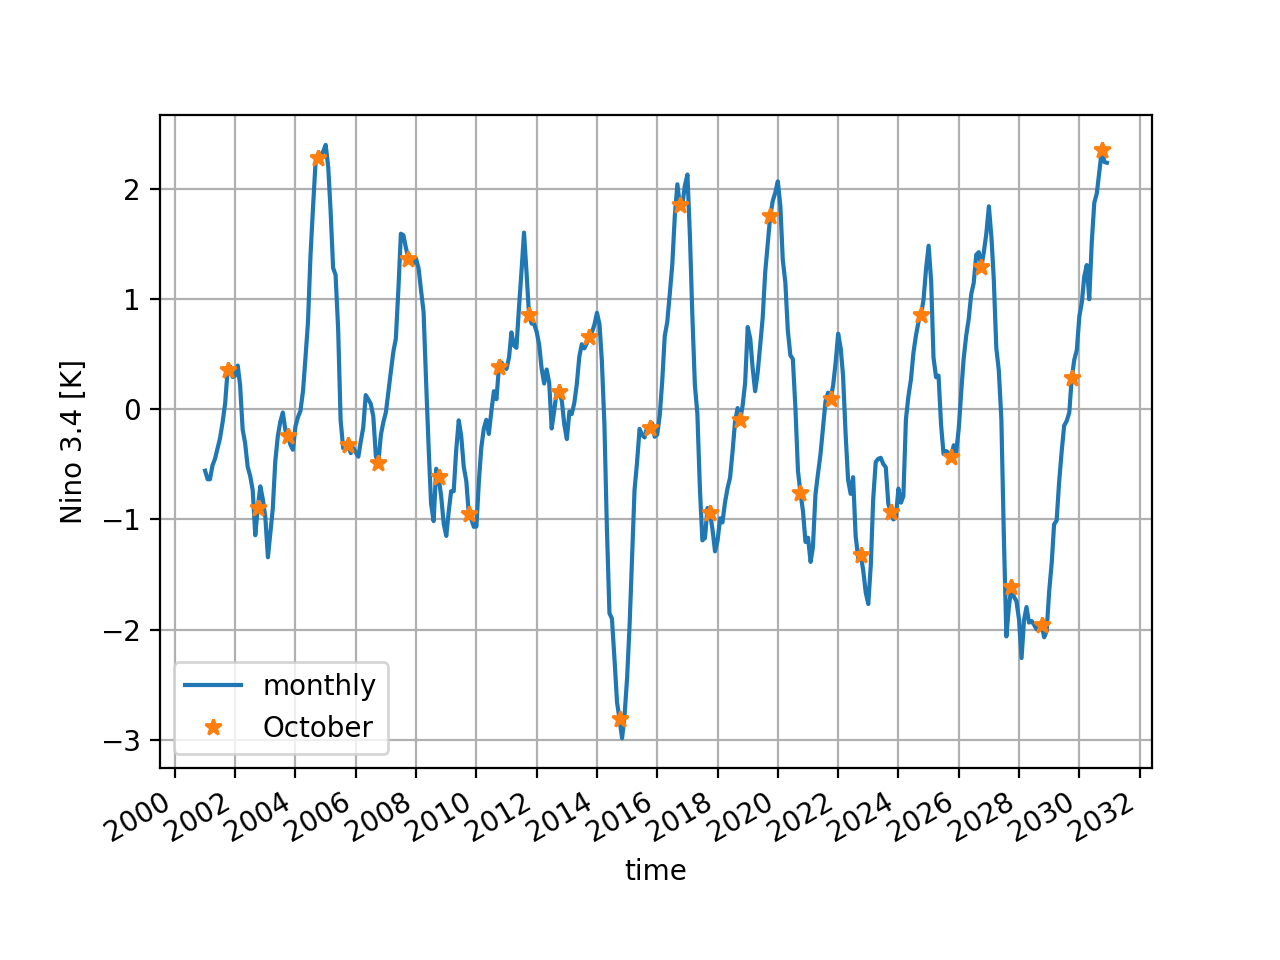

In [11]:
# years 0001-0030
tsa.sel(time=years_clim).plot(label='monthly')
xticksyear(2)
plt.grid(True)
plt.ylabel('Nino 3.4 [K]')

# October values
tmp = tsa.sel(time=years_clim)
tmp = tmp[tmp['time.month']==10]
tmp.plot(ls='none', marker='*', label='October')
plt.legend(frameon=True, loc='lower left')